In [25]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy.linalg as LA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import f1_score
skf = StratifiedKFold(n_splits=3)
from collections import Counter

In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
from modules1 import load_data, calc_roc

In [28]:
data_bt, datat = load_data()
#datat = datat[:, 1536:]
#ones_data_b = data_b[data_b['target']==1]
#zeros_data_b = data_b[data_b['target']==0]

In [11]:
data_bt

,phrase,id,context_text,phrase_len,phrase_num_words,zhakar_dist_context_set,zhakar_dist_phrase_set,zhakar_dist,1_freq,0_freq,freq_analysis,num_words_marusya
0,еще,1,user: еще одну. marusia: Забавной обезьяне бр...,3,1,"{восемь, отлично, к, щетку, еще, щека, тащит, ...",{еще},2.631579,0.083707,0.092298,-0.008590,0
1,точно точно он добрый,2,user: у тебя все нормально. marusia: Со мной ...,21,4,"{мной, слышать, у, тоже, спокойный, жив, тебя,...","{добрый, точно, он}",2.631579,0.115400,0.109837,0.005563,0
2,ты всегда права и у тебя есть права,3,user: отлично я теперь тоже спокойно. marusia...,35,8,"{ты, тоже, ну, теперь, отлично, вы, еще, сказа...","{ты, у, и, всегда, тебя, права, есть}",8.571429,1.225345,1.130145,0.095200,0
3,маруся так ты же вышла автобус уезжает на друг...,4,user: маруся скажи. marusia: Маруся. user: ма...,74,12,"{ну, уезжаем, она, только, вы, скажи, вами, С,...","{ты, вышла, же, на, уезжает, других, пассажиро...",2.222222,1.060481,1.495015,-0.434534,1
4,научи меня читать,5,user: сорок. marusia: Замечательно! 10 на 4?....,17,3,"{marusia, научу, вопросов, сейчас, 4, 10, меня...","{меня, читать, научи}",5.555556,0.211725,0.172757,0.038969,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7113,а я вас,7114,user: я прыгаю от счастья. marusia: Супер мил...,7,3,"{белка, спасибо, мясное, питомца, лучше, у, со...","{вас, я, а}",3.896104,1.068797,0.738075,0.330722,0
7114,маруся она где,7115,user: а во что ты очень сильно любишь играть....,14,3,"{могу, из, нравятся, ты, то, Рассказать, тобой...","{она, где, маруся}",1.851852,0.477128,0.710832,-0.233704,1
7115,не знаю не отвечает почему то,7116,user: привет маруся. marusia: Здравствуйте!. ...,29,6,"{Валера, тобой, привет, Здравствуйте, не, с, р...","{то, не, знаю, почему, отвечает}",10.000000,0.972233,1.193132,-0.220898,0
7116,давай музыку,7117,user: маруся пока маруся спокойной ночи марус...,12,2,"{Доброй, он, Чтобы, сахарных, тогда, ночи, авт...","{музыку, давай}",0.000000,0.139837,0.144054,-0.004217,0


In [30]:
datat.shape

(7118, 4)

In [31]:
np.save('new_features_test.npy', datat[:,:])

In [32]:
np.load('new_features_test.npy').shape

(7118, 4)

In [61]:
data_b.columns

Index(['phrase', 'context', 'target', 'context_text', 'phrase_len',
       'phrase_num_words', 'zhakar_dist_context_set', 'zhakar_dist_phrase_set',
       'zhakar_dist', '1_freq', '0_freq', 'freq_analysis', 'cosine_dist',
       'num_words_marusya', 'num_other_names'],
      dtype='object')

In [14]:
data_b['0_freq'].mean()

5.2618211786274856

In [62]:
data_b[data_b['zhakar_dist'] > 5]

,phrase,context,target,context_text,phrase_len,phrase_num_words,zhakar_dist_context_set,zhakar_dist_phrase_set,zhakar_dist,1_freq,0_freq,freq_analysis,cosine_dist,num_words_marusya,num_other_names
5,включи песню король и шут кукла колдуна,[{'user': 'включи песню король и шут песня кол...,0.0,user: включи песню король и шут песня колдуна...,39,7,"{и, король, user, Шут, вы, слушаю, Кукла, о, к...","{колдуна, и, король, песню, включи, кукла, шут}",22.222222,3.631356,2.161516,1.469840,0.491699,0,0
10,маруся как растрещенная девушка сосет член стр...,[{'user': 'маруся как правильно пользоваться м...,0.0,user: маруся как правильно пользоваться мне ч...,54,7,"{полного, стриптизера, и, очень, вам, user, от...","{стриптизера, растрещенная, девушка, член, мар...",12.244898,4.103630,7.478223,-3.374593,0.613770,1,0
11,слушать баста сан ремо,[{'user': 'баста и полина гагарина песня сан р...,0.0,user: баста и полина гагарина песня сан ремо....,22,4,"{вечер, выходные, Поставь, и, Таймер, user, се...","{слушать, сан, ремо, баста}",7.317073,0.077704,0.033280,0.044424,0.782959,0,0
14,да из за чего маруся,"[{'user': 'это моя мама', 'marusia': 'Мать у в...",0.0,user: это моя мама. marusia: Мать у вас хорош...,20,5,"{и, у, Тактак, user, это, что, за, пустяка, Ма...","{из, за, чего, маруся, да}",11.538462,5.311121,7.313042,-2.001921,0.598877,1,0
23,шум крика совы,"[{'user': 'а кукушки есть', 'marusia': 'Как же...",0.0,"user: а кукушки есть. marusia: Как же, есть! ...",14,3,"{очень, у, user, не, Как, что, ливня, а, бесто...","{шум, совы, крика}",9.090909,0.132614,0.052860,0.079753,0.686279,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28893,да ладно,[{'user': 'только макаршки я не оказывал и воо...,0.0,user: только макаршки я не оказывал и вообще ...,8,2,"{и, только, user, не, это, дыхании, что, fange...","{ладно, да}",5.128205,3.121523,1.575859,1.545664,0.730469,0,0
28894,ведь очень красивая,"[{'user': 'какая вы умная хочу слушать', 'maru...",1.0,user: какая вы умная хочу слушать. marusia: Я...,19,3,"{очень, user, не, умная, что, Как, а, может, в...","{ведь, очень, красивая}",6.250000,0.557743,0.480523,0.077220,0.558105,0,0
28896,двенадцать часов ночи я тебя скачала,[{'user': 'ты знаешь артура михалияна он вчера...,0.0,user: ты знаешь артура михалияна он вчера с т...,36,6,"{мало, мило, user, ответов, михалияна, что, а,...","{я, ночи, часов, скачала, тебя, двенадцать}",10.000000,5.942988,5.618266,0.324722,0.732666,0,0
28897,подделки до пятого класса па чертизу,[{'user': 'можно фотографии поделок для пятого...,0.0,user: можно фотографии поделок для пятого кла...,36,6,"{», чертеж, будет, и, user, можно, класса, дер...","{чертизу, класса, до, па, пятого, подделки}",6.666667,0.272805,27.234556,-26.961751,0.701172,0,0


In [12]:
data_b[data_b['num_words_marusya'] > 1]

,phrase,context,target,context_text,phrase_len,phrase_num_words,cosine_dist,num_words_marusya,num_other_names
77,ладно маруся маруся маруся маруся маруся марус...,"[{'user': 'включи шум топора', 'marusia': 'Ста...",0.0,user: включи шум топора. marusia: Ставлю шум ...,208,30,0.422852,29,0
217,маруся маруся маруся маруся,"[{'user': 'стоп', 'marusia': ''}, {'user': 'вк...",0.0,user: стоп. user: включи сказку о глупом мышо...,27,4,0.633057,4,0
250,маруся маруся маруся маруся маруся сладуся сла...,"[{'user': 'vk маруся', 'marusia': 'Простите, я...",0.0,"user: vk маруся. marusia: Простите, я не знаю...",106,14,0.476562,5,0
353,ой маруся маруся,"[{'user': 'маруся включи сказку', 'marusia': '...",0.0,user: маруся включи сказку. marusia: Слушаем ...,16,3,0.698242,2,0
416,ну ладно маруся маруся то есть маруся,[{'user': 'маруся или как там ты мариша я не з...,0.0,user: маруся или как там ты мариша я не знаю ...,37,7,0.672119,3,0
...,...,...,...,...,...,...,...,...,...
28066,маруся маруся два,[{'user': 'маруся как будет на английском сто ...,0.0,user: маруся как будет на английском сто кара...,17,3,0.683838,2,0
28479,маруся маруся маруся инбуся ты с ума шла,[{'user': 'единственное повторила которая срет...,0.0,user: единственное повторила которая срет. ma...,40,8,0.688232,3,0
28541,маруся маруся маруся,"[{'user': 'выключение', 'marusia': 'Хороший во...",0.0,user: выключение. marusia: Хороший вопрос!. u...,20,3,0.487793,3,0
28629,маруся а давайте ты маруся поцелуешься с марусей,"[{'user': '', 'marusia': ''}, {'user': '', 'ma...",0.0,marusia: Я счастлива.. user: слушайте стих со...,48,8,0.630859,2,0


In [15]:
ones_data_b.sample(100)

,phrase,context,target,context_text,phrase_len,phrase_num_words,cosine_dist,num_words_marusya,num_other_names
11507,ты не можешь,"[{'user': 'скажи маруся', 'marusia': 'Маруся'}...",1.0,user: скажи маруся. marusia: Маруся. user: ск...,12,3,0.671875,0,0
5286,а другое дело,"[{'user': 'подбрось монетку давай играть', 'ma...",1.0,user: подбрось монетку давай играть. marusia:...,13,3,0.804077,0,0
23380,я сказал болит,"[{'user': 'миранна', 'marusia': 'Вашим светлос...",1.0,user: миранна. marusia: Вашим светлостям чего...,14,3,0.706787,0,0
20777,маруся я тебя приглашаю даже на мой день рождения,"[{'user': 'отлично очень отлично маруся', 'mar...",1.0,user: отлично очень отлично маруся. marusia: ...,49,9,0.613770,1,0
2531,одиннадцать тринадцать,"[{'user': 'ты можешь ничего не делать', 'marus...",1.0,user: ты можешь ничего не делать. marusia: Ой...,22,2,0.672852,0,0
...,...,...,...,...,...,...,...,...,...
19597,не знаю просто,"[{'user': 'а ты интеллект', 'marusia': 'Мне эт...",1.0,user: а ты интеллект. marusia: Мне это часто ...,14,3,0.718994,0,0
28846,раз два три четыре пять,"[{'user': 'я еще читаю сказки', 'marusia': 'Хо...",1.0,user: я еще читаю сказки. marusia: Хорошее де...,23,5,0.683838,0,0
1724,шоколад это будет военного куша,"[{'user': 'поиграем', 'marusia': 'Вот какие иг...",1.0,user: поиграем. marusia: Вот какие игры у мен...,31,5,0.728760,0,0
23440,алиса алиса алиса,"[{'user': '', 'marusia': ''}, {'user': 'расска...",1.0,"user: расскажи анекдот. marusia: Если то, что...",17,3,0.720215,0,3


In [52]:
data_b.iloc[22417]['context']

"[{'user': 'а почему а кто а кто придумал мультик валеру', 'marusia': 'Валерий Потокин'}, {'user': 'какой', 'marusia': 'Курс на 15 сентября: доллар стоит 59 рублей, 78 копеек, евро стоит 59 рублей, 84 копейки.'}, {'user': 'кто указывает замвалевый желейный медведь', 'marusia': 'Ох, я не знаю. Если узнаете ответ, скажите мне тоже'}, {'user': 'тоже', 'marusia': 'Это вы о чём?'}, {'user': 'о чем', 'marusia': 'О чём угодно, лишь бы радовало вас'}]"

In [ ]:
words_diff = words_zeros

NameError: name 'ones_data_b' is not defined

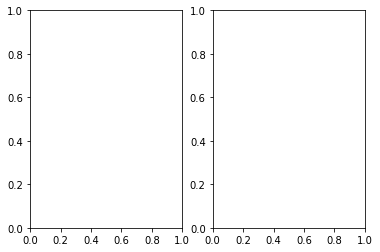

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.hist(ones_data_b['num_other_names'], bins=12)
ax2.hist(zeros_data_b['num_other_names'].sample(len(ones_data_b)), bins=12)

(array([5.843e+03, 2.550e+02, 1.300e+01, 1.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.        ,  3.83333333,  7.66666667, 11.5       , 15.33333333,
        19.16666667, 23.        , 26.83333333, 30.66666667, 34.5       ,
        38.33333333, 42.16666667, 46.        ]),
 <BarContainer object of 12 artists>)

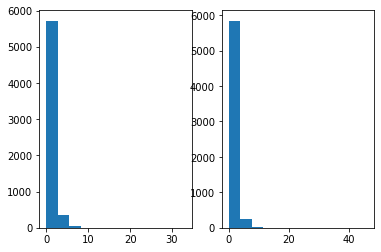

In [53]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.hist(ones_data_b['num_words_marusya'], bins=12)
ax2.hist(zeros_data_b['num_words_marusya'].sample(len(ones_data_b)), bins=12)

In [63]:
len(ones_data_b[ones_data_b['num_words_marusya'] > 3]) / len(ones_data_b)

0.03040209218698921

In [64]:
len(zeros_data_b[zeros_data_b['num_words_marusya'] > 3]) / len(zeros_data_b)

0.045296931922924985

In [ ]:
num_other_names

In [70]:
len(ones_data_b[ones_data_b['num_other_names'] > 1]) / len(ones_data_b)

0.10215756783262504

In [72]:
len(zeros_data_b[zeros_data_b['num_other_names'] > 1]) / len(zeros_data_b)

0.025589255146381072

(array([2.000e+00, 1.000e+00, 2.000e+00, 1.600e+01, 5.100e+01, 2.250e+02,
        5.640e+02, 1.185e+03, 1.931e+03, 1.628e+03, 4.720e+02, 4.100e+01]),
 array([0.09667969, 0.16456604, 0.23245239, 0.30033875, 0.3682251 ,
        0.43611145, 0.5039978 , 0.57188416, 0.63977051, 0.70765686,
        0.77554321, 0.84342957, 0.91131592]),
 <BarContainer object of 12 artists>)

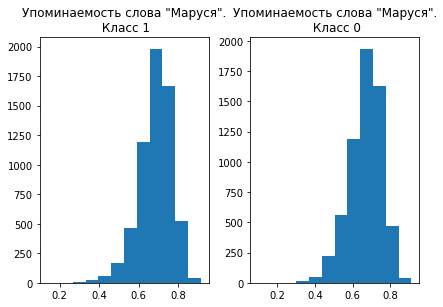

In [37]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
plt.tight_layout()
#plt.title('Упоминаемость слова "Маруся"')
ax1.set_title('Упоминаемость слова "Маруся".\n Класс 1')
ax2.set_title('Упоминаемость слова "Маруся".\n Класс 0')
ax1.hist(ones_data_b['cosine_dist'], bins=12)
ax2.hist(zeros_data_b['cosine_dist'].sample(len(ones_data_b)), bins=12)

(array([1.340e+04, 6.983e+03, 1.406e+03, 6.060e+02, 1.750e+02, 1.190e+02,
        5.000e+01, 2.200e+01, 1.000e+01, 5.000e+00, 4.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  4.6,  8.2, 11.8, 15.4, 19. , 22.6, 26.2, 29.8, 33.4, 37. ,
        40.6, 44.2, 47.8, 51.4, 55. ]),
 <BarContainer object of 15 artists>)

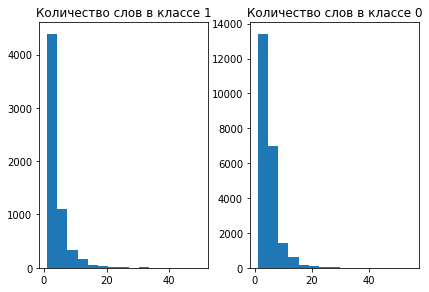

In [28]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
plt.tight_layout()
ax1.set_title('Количество слов в классе 1')
ax2.set_title('Количество слов в классе 0')
ax1.hist(ones_data_b['phrase_num_words'], bins=15)
#ax2.hist(zeros_data_b['phrase_num_words'].sample(len(ones_data_b)), bins=15)
ax2.hist(zeros_data_b['phrase_num_words'], bins=15)

(array([1.340e+04, 6.983e+03, 1.406e+03, 6.060e+02, 1.750e+02, 1.190e+02,
        5.000e+01, 2.200e+01, 1.000e+01, 5.000e+00, 4.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  4.6,  8.2, 11.8, 15.4, 19. , 22.6, 26.2, 29.8, 33.4, 37. ,
        40.6, 44.2, 47.8, 51.4, 55. ]),
 <BarContainer object of 15 artists>)

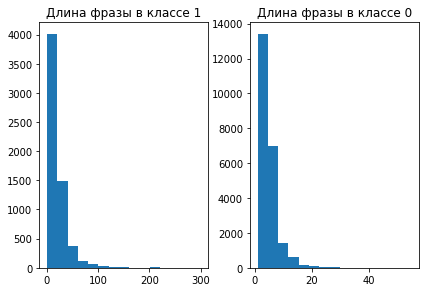

In [31]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
plt.tight_layout()
ax1.set_title('Длина фразы в классе 1')
ax2.set_title('Длина фразы в классе 0')
ax1.hist(ones_data_b['phrase_len'], bins=15)
#ax2.hist(zeros_data_b['phrase_len'].sample(len(ones_data_b)), bins=15)
ax2.hist(zeros_data_b['phrase_num_words'], bins=15)

(array([2.000e+00, 1.000e+00, 1.000e+00, 2.300e+01, 5.600e+01, 1.480e+02,
        4.120e+02, 1.080e+03, 2.118e+03, 3.774e+03, 5.564e+03, 5.762e+03,
        2.966e+03, 7.880e+02, 8.800e+01]),
 array([0.09667969, 0.15098877, 0.20529785, 0.25960693, 0.31391602,
        0.3682251 , 0.42253418, 0.47684326, 0.53115234, 0.58546143,
        0.63977051, 0.69407959, 0.74838867, 0.80269775, 0.85700684,
        0.91131592]),
 <BarContainer object of 15 artists>)

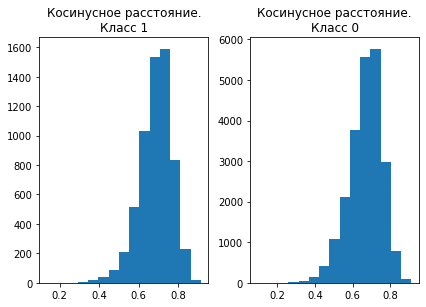

In [51]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
plt.tight_layout()
ax1.set_title('Косинусное расстояние.\nКласс 1')
ax2.set_title('Косинусное расстояние.\nКласс 0')
ax1.hist(ones_data_b['cosine_dist'], bins=15)
#ax2.hist(zeros_data_b['phrase_len'].sample(len(ones_data_b)), bins=15)
ax2.hist(zeros_data_b['cosine_dist'], bins=15)

(array([1.340e+04, 6.983e+03, 1.406e+03, 6.060e+02, 1.750e+02, 1.190e+02,
        5.000e+01, 2.200e+01, 1.000e+01, 5.000e+00, 4.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  4.6,  8.2, 11.8, 15.4, 19. , 22.6, 26.2, 29.8, 33.4, 37. ,
        40.6, 44.2, 47.8, 51.4, 55. ]),
 <BarContainer object of 15 artists>)

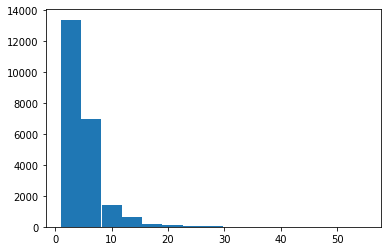

In [44]:
plt.hist(zeros_data_b['phrase_num_words'], bins=15)

In [16]:
data_b.iloc[28615]['context']

"[{'user': 'песня арктика', 'marusia': 'Я потеряла связь с вашим аккаунтом VK ID. Добавьте его заново в настройках моего приложения, чтобы слушать музыку'}, {'user': '', 'marusia': ''}, {'user': 'ну что то у тебя глюк', 'marusia': 'Нет, у меня все стабильно'}, {'user': '', 'marusia': ''}, {'user': 'ну смотри за хабиба', 'marusia': 'Ладно посмотрим что я увижу'}]"

(array([1.338e+04, 5.303e+03, 2.319e+03, 9.680e+02, 4.280e+02, 1.930e+02,
        9.800e+01, 3.800e+01, 2.500e+01, 8.000e+00, 1.000e+01, 4.000e+00,
        2.000e+00, 4.000e+00, 3.000e+00]),
 array([ 0.        ,  3.80952381,  7.61904762, 11.42857143, 15.23809524,
        19.04761905, 22.85714286, 26.66666667, 30.47619048, 34.28571429,
        38.0952381 , 41.9047619 , 45.71428571, 49.52380952, 53.33333333,
        57.14285714]),
 <BarContainer object of 15 artists>)

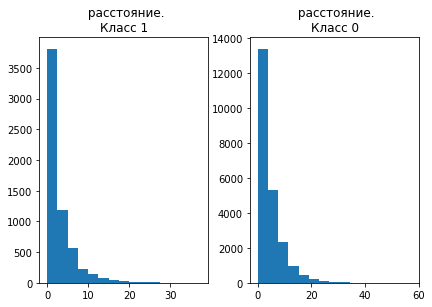

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
plt.tight_layout()
ax1.set_title(' расстояние.\nКласс 1')
ax2.set_title(' расстояние.\nКласс 0')
ax1.hist(ones_data_b['zhakar_dist'], bins=15)
#ax2.hist(zeros_data_b['phrase_len'].sample(len(ones_data_b)), bins=15)
ax2.hist(zeros_data_b['zhakar_dist'], bins=15)

In [17]:
data_b.iloc[28615]['phrase']

'ну я что ⁇ то не куришь говорить пошли ха ну я что ⁇ то не куришь говорить пошли ха ну я что то не куришь говорить пошли бухали бухали'

In [20]:
ones_data_b[ones_data_b['0_freq'] > 0.1]

,phrase,context,target,context_text,phrase_len,phrase_num_words,zhakar_dist_context_set,zhakar_dist_phrase_set,zhakar_dist,1_freq,0_freq,cosine_dist,num_words_marusya,num_other_names
252,потому что ее парень пришел а мой нет сейчас н...,[{'user': 'наш у него может киндер разобрать я...,1.0,user: наш у него может киндер разобрать я все...,197,41,"{поругались, хотела, наш, она, у, user, это, ч...","{вместе, пошли, пришел, мой, нет, они, узнал, ...",11.475410,0.525717,0.498511,0.502930,0,0
272,самый дружелюбный голосовой помощник на свете ...,"[{'user': '', 'marusia': ''}, {'user': '', 'ma...",1.0,"marusia: Если вам нужна помощь, я к вашим усл...",99,15,"{вам, говорит, нужна, услугам, проходите, Мару...","{самый, меня, поболтать, спросите, дружелюбный...",25.000000,0.079449,0.127903,0.552490,1,0
289,смотри не догоняет то что это блюд что за конс...,"[{'user': 'маруся я съем трубочку', 'marusia':...",1.0,user: маруся я съем трубочку. marusia: Уже сл...,79,15,"{очень, и, медведя, углекислоты, вам, сердцеби...","{консультация, блюд, не, это, веществ, что, ка...",2.531646,0.151339,0.151268,0.781128,0,0
451,ну когда я не придет,"[{'user': 'что ж вы неплохо справляетесь', 'ma...",1.0,user: что ж вы неплохо справляетесь. marusia:...,20,5,"{представьте, очень, и, вот, горжусь, user, не...","{я, не, придет, ну, когда}",5.714286,0.092430,0.101720,0.772705,0,0
520,вот ну я все на таком ходил но тепло было,"[{'user': 'включи свет', 'marusia': 'Готово'},...",1.0,user: включи свет. marusia: Готово. user: вык...,41,10,"{выключи, user, градусов, улице, Готово, перем...","{было, вот, я, все, таком, тепло, но, ну, ходи...",3.030303,0.100893,0.101243,0.743652,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28731,почему она так долго с ними почему денис не та...,"[{'user': 'громкость пять', 'marusia': ''}, {'...",1.0,user: громкость пять. user: radio record. mar...,77,16,"{radio, Вы, пять, громкость, user, Радио, Вклю...","{она, денис, так, не, что, ты, ездит, ебаушка,...",7.407407,0.197154,0.182975,0.726562,0,0
28759,марусь я тебя удалю я не люблю не нагонят,"[{'user': 'маруся включи меня прогонят', 'maru...",1.0,user: маруся включи меня прогонят. marusia: В...,41,9,"{люблю, user, не, давайте, Ага, о, Ставлю, уда...","{люблю, я, не, удалю, нагонят, марусь, тебя}",17.857143,0.208620,0.166278,0.541992,0,0
28840,если я буду я так понимаю что они поиграть пот...,"[{'user': 'еще тише', 'marusia': ''}, {'user':...",1.0,user: еще тише. user: выключи. user: ты видел...,79,16,"{выключи, будет, только, user, не, обязательно...","{будет, болит, они, у, меня, голова, я, так, е...",2.564103,0.229547,0.192589,0.689453,0,0
28874,ты балбес это маруся,"[{'user': 'вот теперь понятно', 'marusia': 'От...",1.0,user: вот теперь понятно. marusia: Отлично.. ...,20,4,"{человек, и, вот, user, Молодой, милый, конешн...","{ты, балбес, это, маруся}",2.777778,0.140974,0.116621,0.632812,1,0


In [1]:
zeros_data_b[zeros_data_b['phrase_num_words'] > 40]

NameError: name 'zeros_data_b' is not defined

## Final tests

No parameters: naive bayes, logreg, voting_classifier, decision_tree
iterated parameters: 
KNN 
random_forest depth=10

In [23]:
calc_roc(data, target, algo=['logreg'],n_splits=5)

Logistic regression:0.7252859142569377


In [ ]:
calc_roc(data, target, algo=['random_forest', 'naive_bayes', 'knn', 'decision_tree', 'voting_classifier'], n_splits=5)

Random forest:0.7236982011924251
Naive bayes:0.6889445947566019
KNN:0.6075795843495179
Decision tree:

In [71]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.00001)
clf.fit(data, target)
print(clf.coef_)

[-0.00034471  0.01189556 -0.01143521 ... -0.05173972 -0.00662048
  0.01120015]


/home/jupyter-admin/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.289e+03, tolerance: 4.823e-01
  model = cd_fast.enet_coordinate_descent(


In [72]:
opt_ind = np.where(np.abs(clf.coef_) > 0.000001)[0]

In [73]:
len(opt_ind)

1504